In [ ]:
accident_data <- read.csv("/content/final_data.csv")


In [ ]:
# prompt: drop columns with name date,hour, tsun, snow, wpgt, LATTITUDENAME, LONGITUDENAME, X and TWAY_ID2, MILEPTNAME, DAYNAME
library(tidyverse)
accident_data <- accident_data %>%
  select(-X, -date, -hour, -tsun, -snow, -wpgt, -LATITUDENAME, -LONGITUDNAME, -X, -TWAY_ID2, -MILEPTNAME, -DAYNAME, -Unnamed..0)

In [ ]:
# We need the specific values of fatal accidents for the t.test we are going to perform
deaths_by_month <- accident_data %>%
  group_by(MONTHNAME) %>%
  summarize(total_fatals = sum(FATALS))
deaths_by_month

MONTHNAME,total_fatals
<chr>,<int>
April,3557
August,4013
December,3498
February,2561
January,3099
July,3879
June,3789
March,3214
May,3768


In [ ]:
crash_by_month <- accident_data %>%
  group_by(MONTHNAME) %>%
  summarize(n = n())


crash_by_month <- crash_by_month %>%
  rename(Number_of_Crash = n)
crash_by_month

MONTHNAME,Number_of_Crash
<chr>,<int>
April,3271
August,3715
December,3241
February,2340
January,2835
July,3562
June,3466
March,2901
May,3435


In [ ]:
# Can create piechart using ggplot
# Number of accidents by State
state_accident <- accident_data %>%
  group_by(STATENAME) %>%
  summarize(n = n()) %>%
  arrange(desc(n))

state_accident


STATENAME,n
<chr>,<int>
Texas,4068
California,3983
Florida,3451
Georgia,1670
North Carolina,1535
Ohio,1242
Tennessee,1229
Illinois,1210
Pennsylvania,1153


In [ ]:
regions <- list(
  "Northeast" = c("Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont","New Jersey", "New York", "Pennsylvania"),
  "Midwest" = c("Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin","Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"),
  "South" = c("Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "Washington, D.C.", "West Virginia","Alabama", "Kentucky", "Mississippi", "Tennessee","Arkansas", "Louisiana", "Oklahoma", "Texas"),
  "West" = c("Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington")
)

In [ ]:
accident_data <- accident_data %>%
  mutate(Region = case_when(
    STATENAME %in% regions$Northeast ~ "Northeast",
    STATENAME %in% regions$Midwest ~ "Midwest",
    STATENAME %in% regions$South ~ "South",
    STATENAME %in% regions$West ~ "West",
    TRUE ~ NA_character_
  ))

In [ ]:
state_accident <- accident_data %>%
  group_by(Region) %>%
  summarize(n = n()) %>%
  arrange(desc(n))

state_accident

Region,n
<chr>,<int>
South,19397
West,8640
Midwest,7459
Northeast,3972
NA,40


In [ ]:
merged_data <- merge(deaths_by_month, crash_by_month, by = "MONTHNAME")


In [ ]:
merged_data

MONTHNAME,total_fatals,Number_of_Crash
<chr>,<int>,<int>
April,3557,3271
August,4013,3715
December,3498,3241
February,2561,2340
January,3099,2835
July,3879,3562
June,3789,3466
March,3214,2901
May,3768,3435


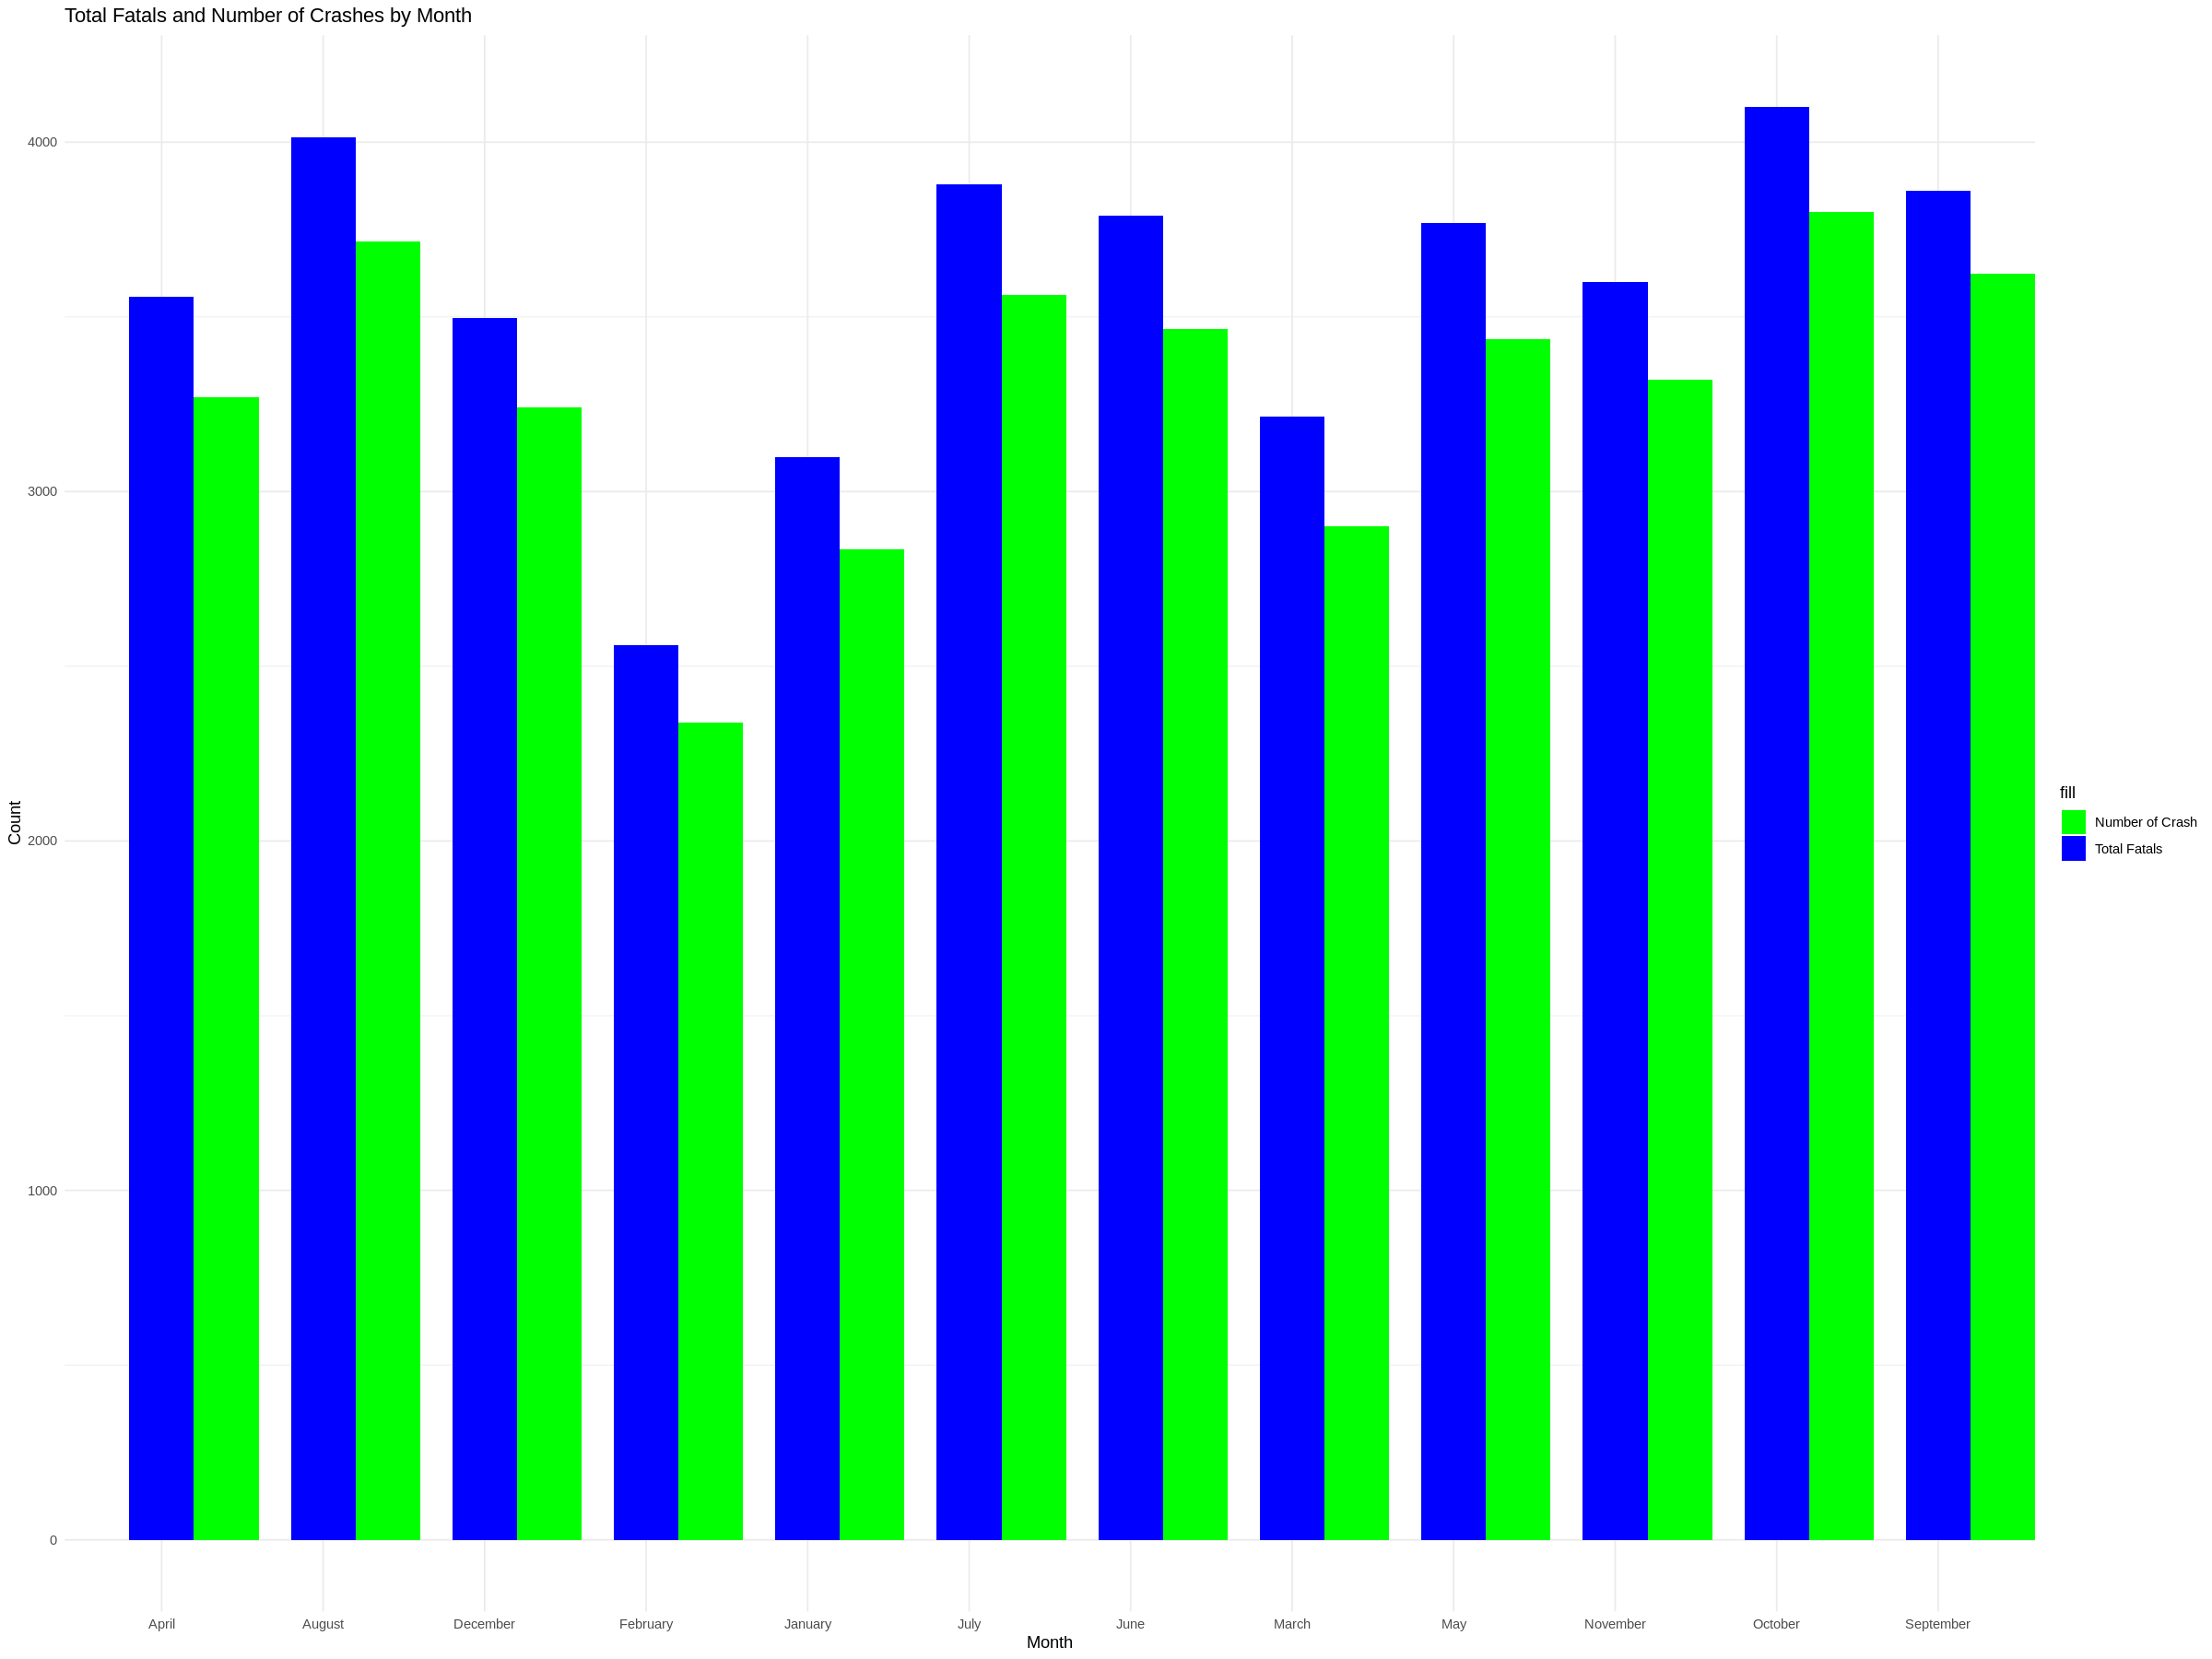

In [ ]:
# Create a bar chart
ggplot(merged_data, aes(x = MONTHNAME)) +
  geom_bar(aes(y = total_fatals, fill = "Total Fatals"), stat = "identity", width = 0.4, position = "identity") +
  geom_bar(aes(y = Number_of_Crash, fill = "Number of Crash"), stat = "identity", width = 0.4, position = position_nudge(x = 0.4)) +
  labs(title = "Total Fatals and Number of Crashes by Month", x = "Month", y = "Count") +
  scale_fill_manual(values = c("Total Fatals" = "blue", "Number of Crash" = "green")) +
  theme_minimal()


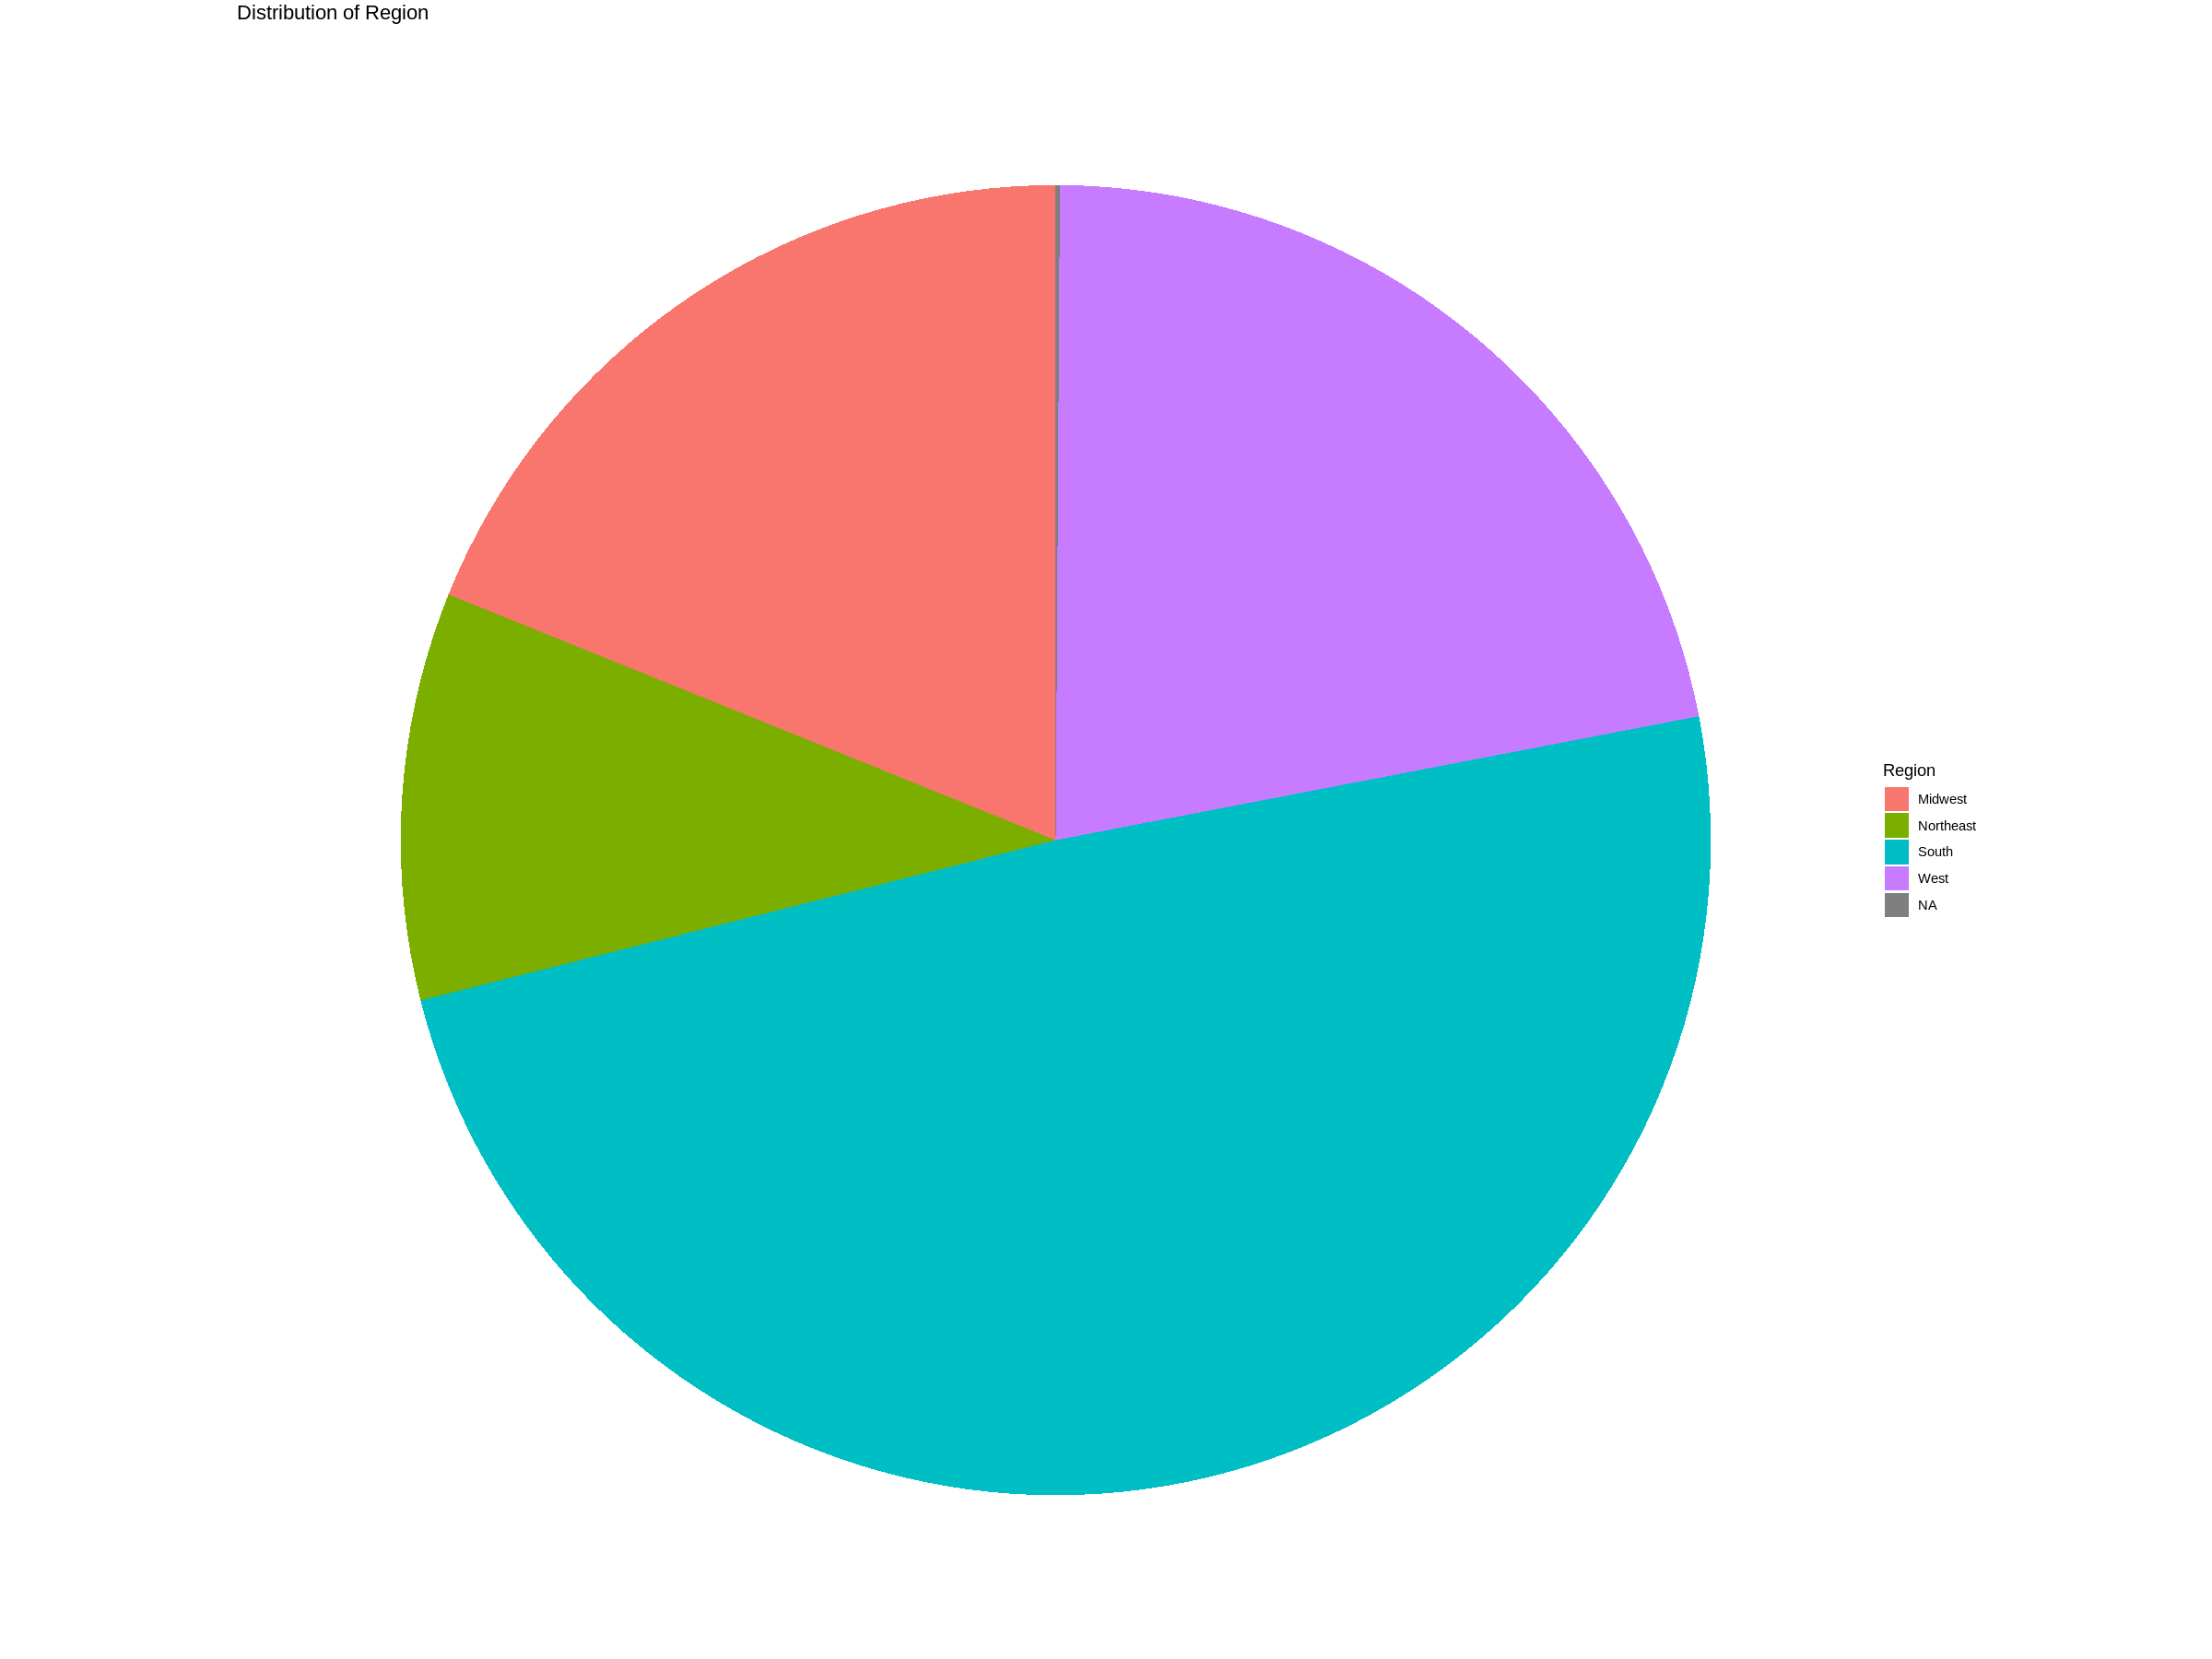

In [ ]:

ggplot(state_accident, aes(x = "", y = n, fill = Region)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Distribution of Region", fill = "Region") +
  theme_void() +
  theme(legend.position = "right")

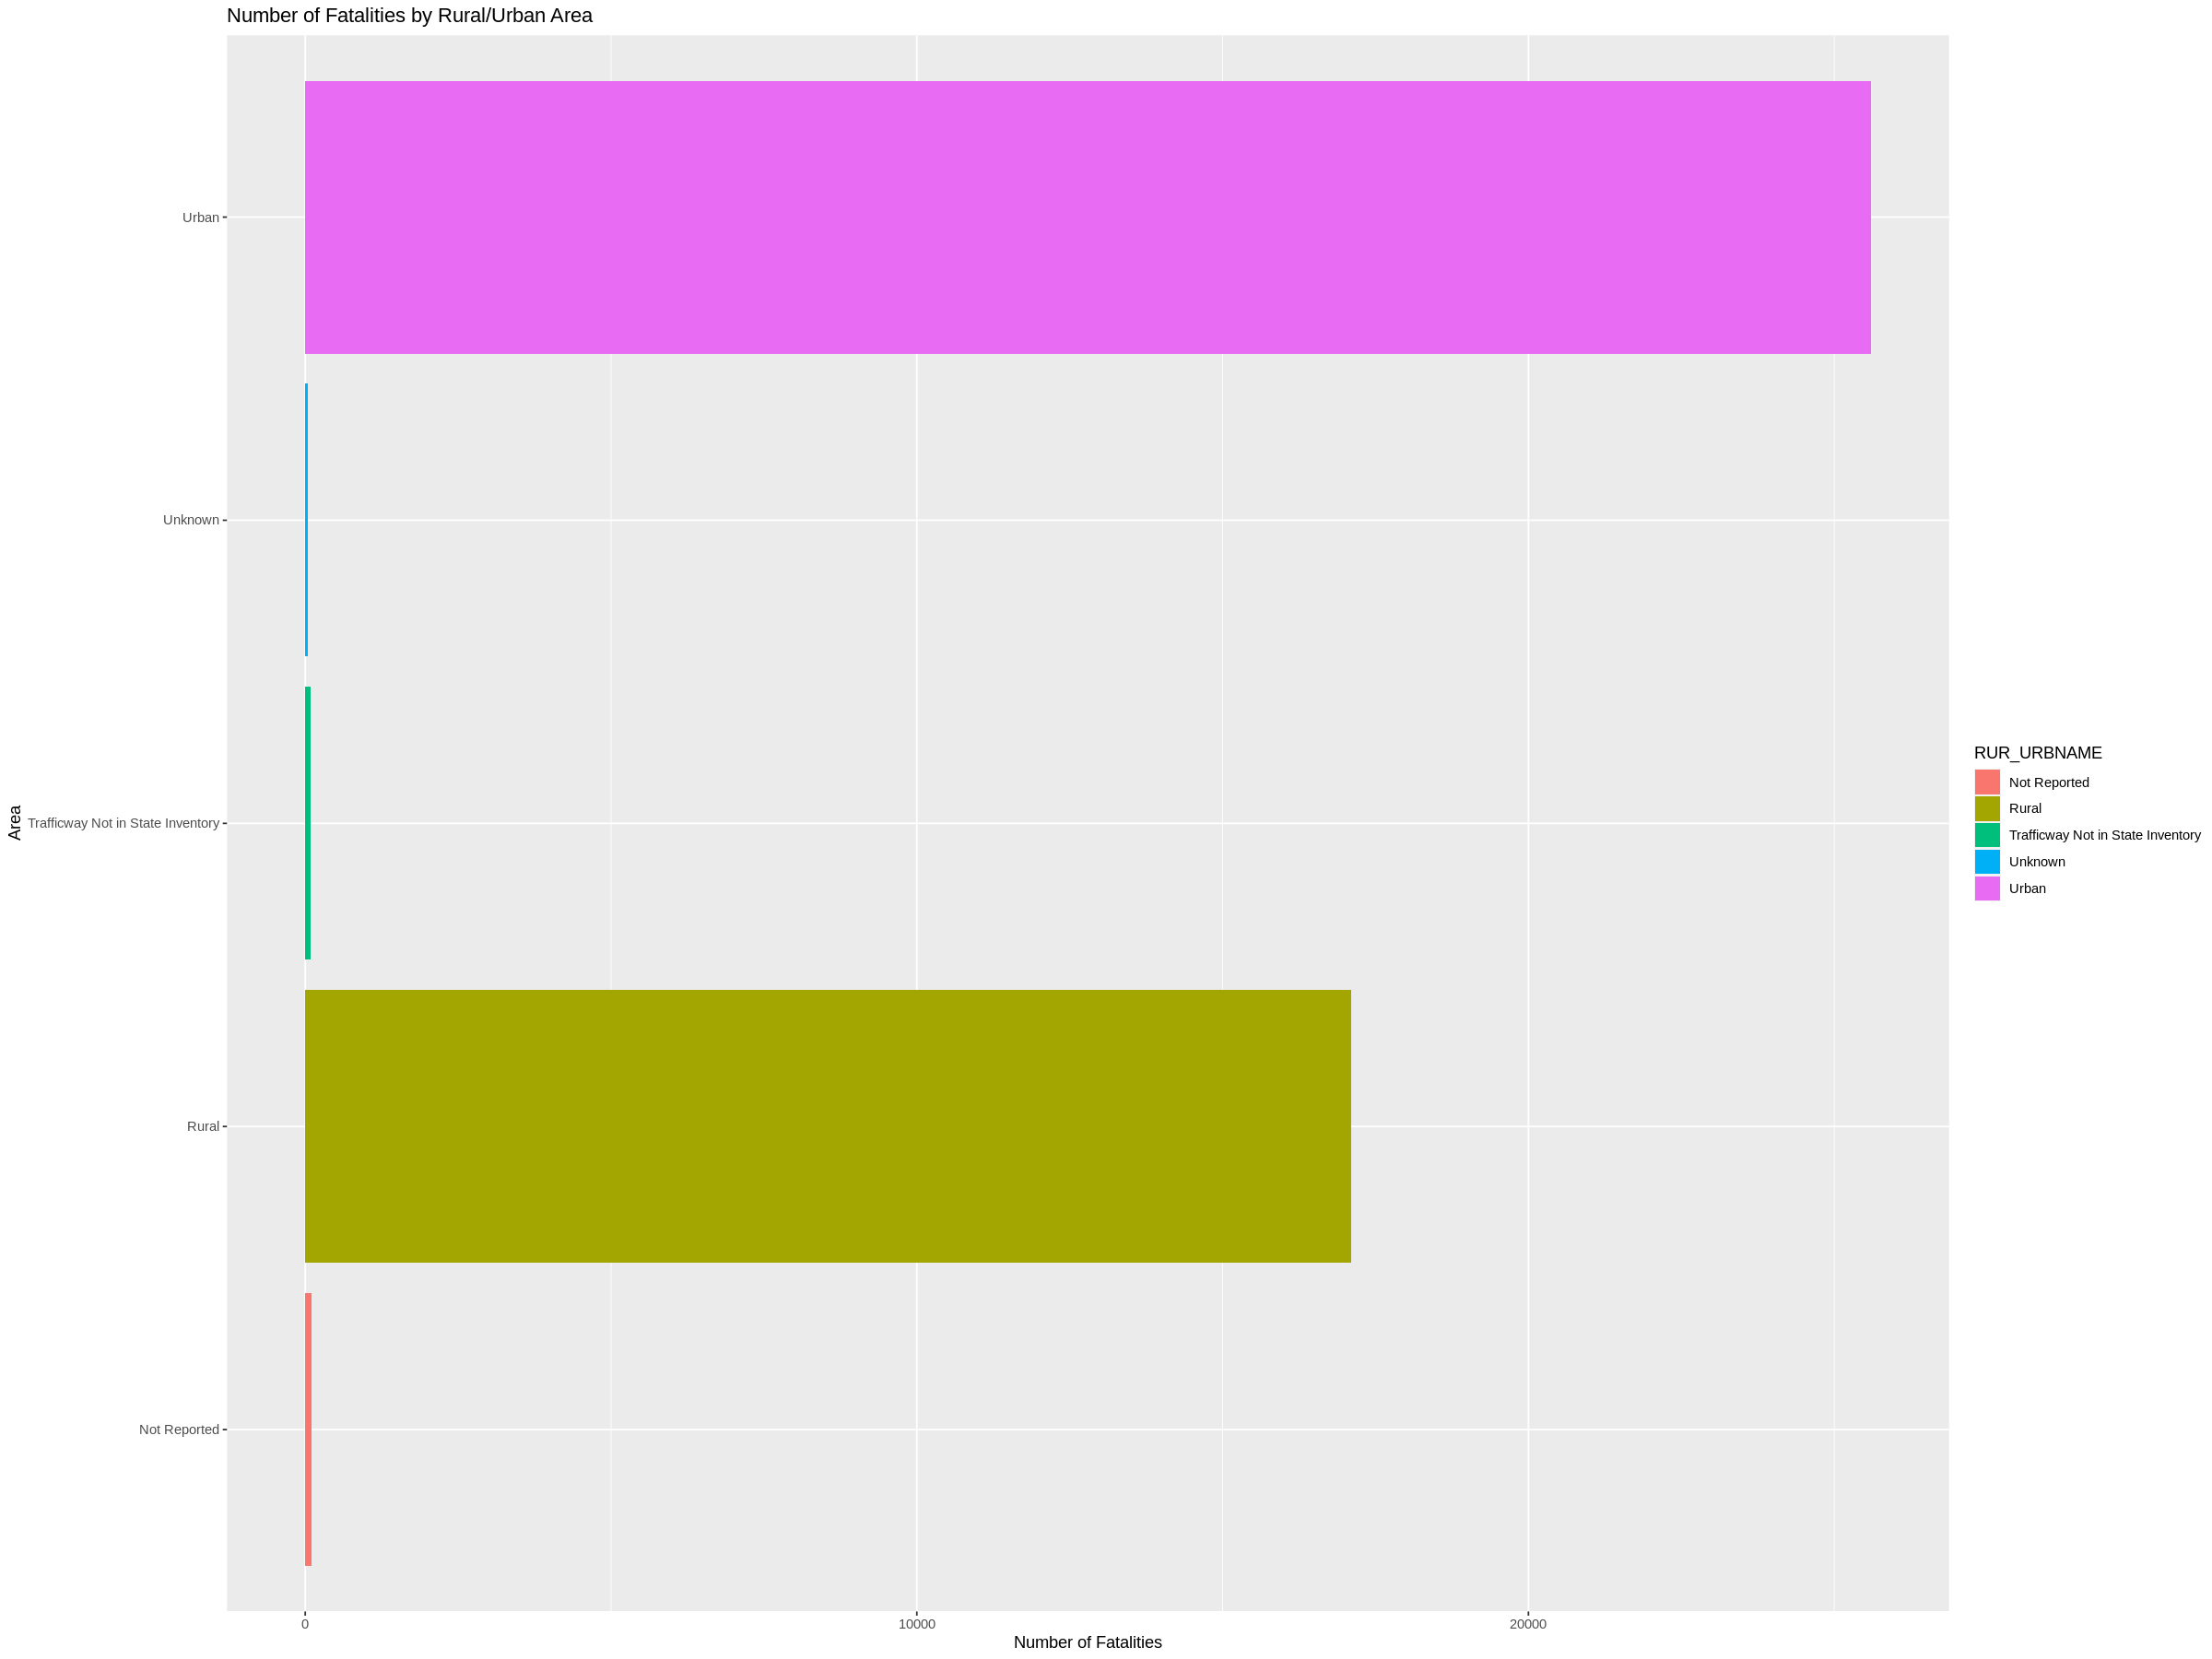

In [ ]:
# Total Number of accidents in Rural and Urban areas(Unknown values, Accidents not involved in state inventory)

accident_data %>%
  group_by(RUR_URBNAME) %>%
  summarize(total_fatals = sum(FATALS)) %>%
  ggplot(aes(x = RUR_URBNAME, y = total_fatals, fill = RUR_URBNAME)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Fatalities by Rural/Urban Area", x = "Area", y = "Number of Fatalities") +
  coord_flip()

`geom_smooth()` using formula = 'y ~ x'


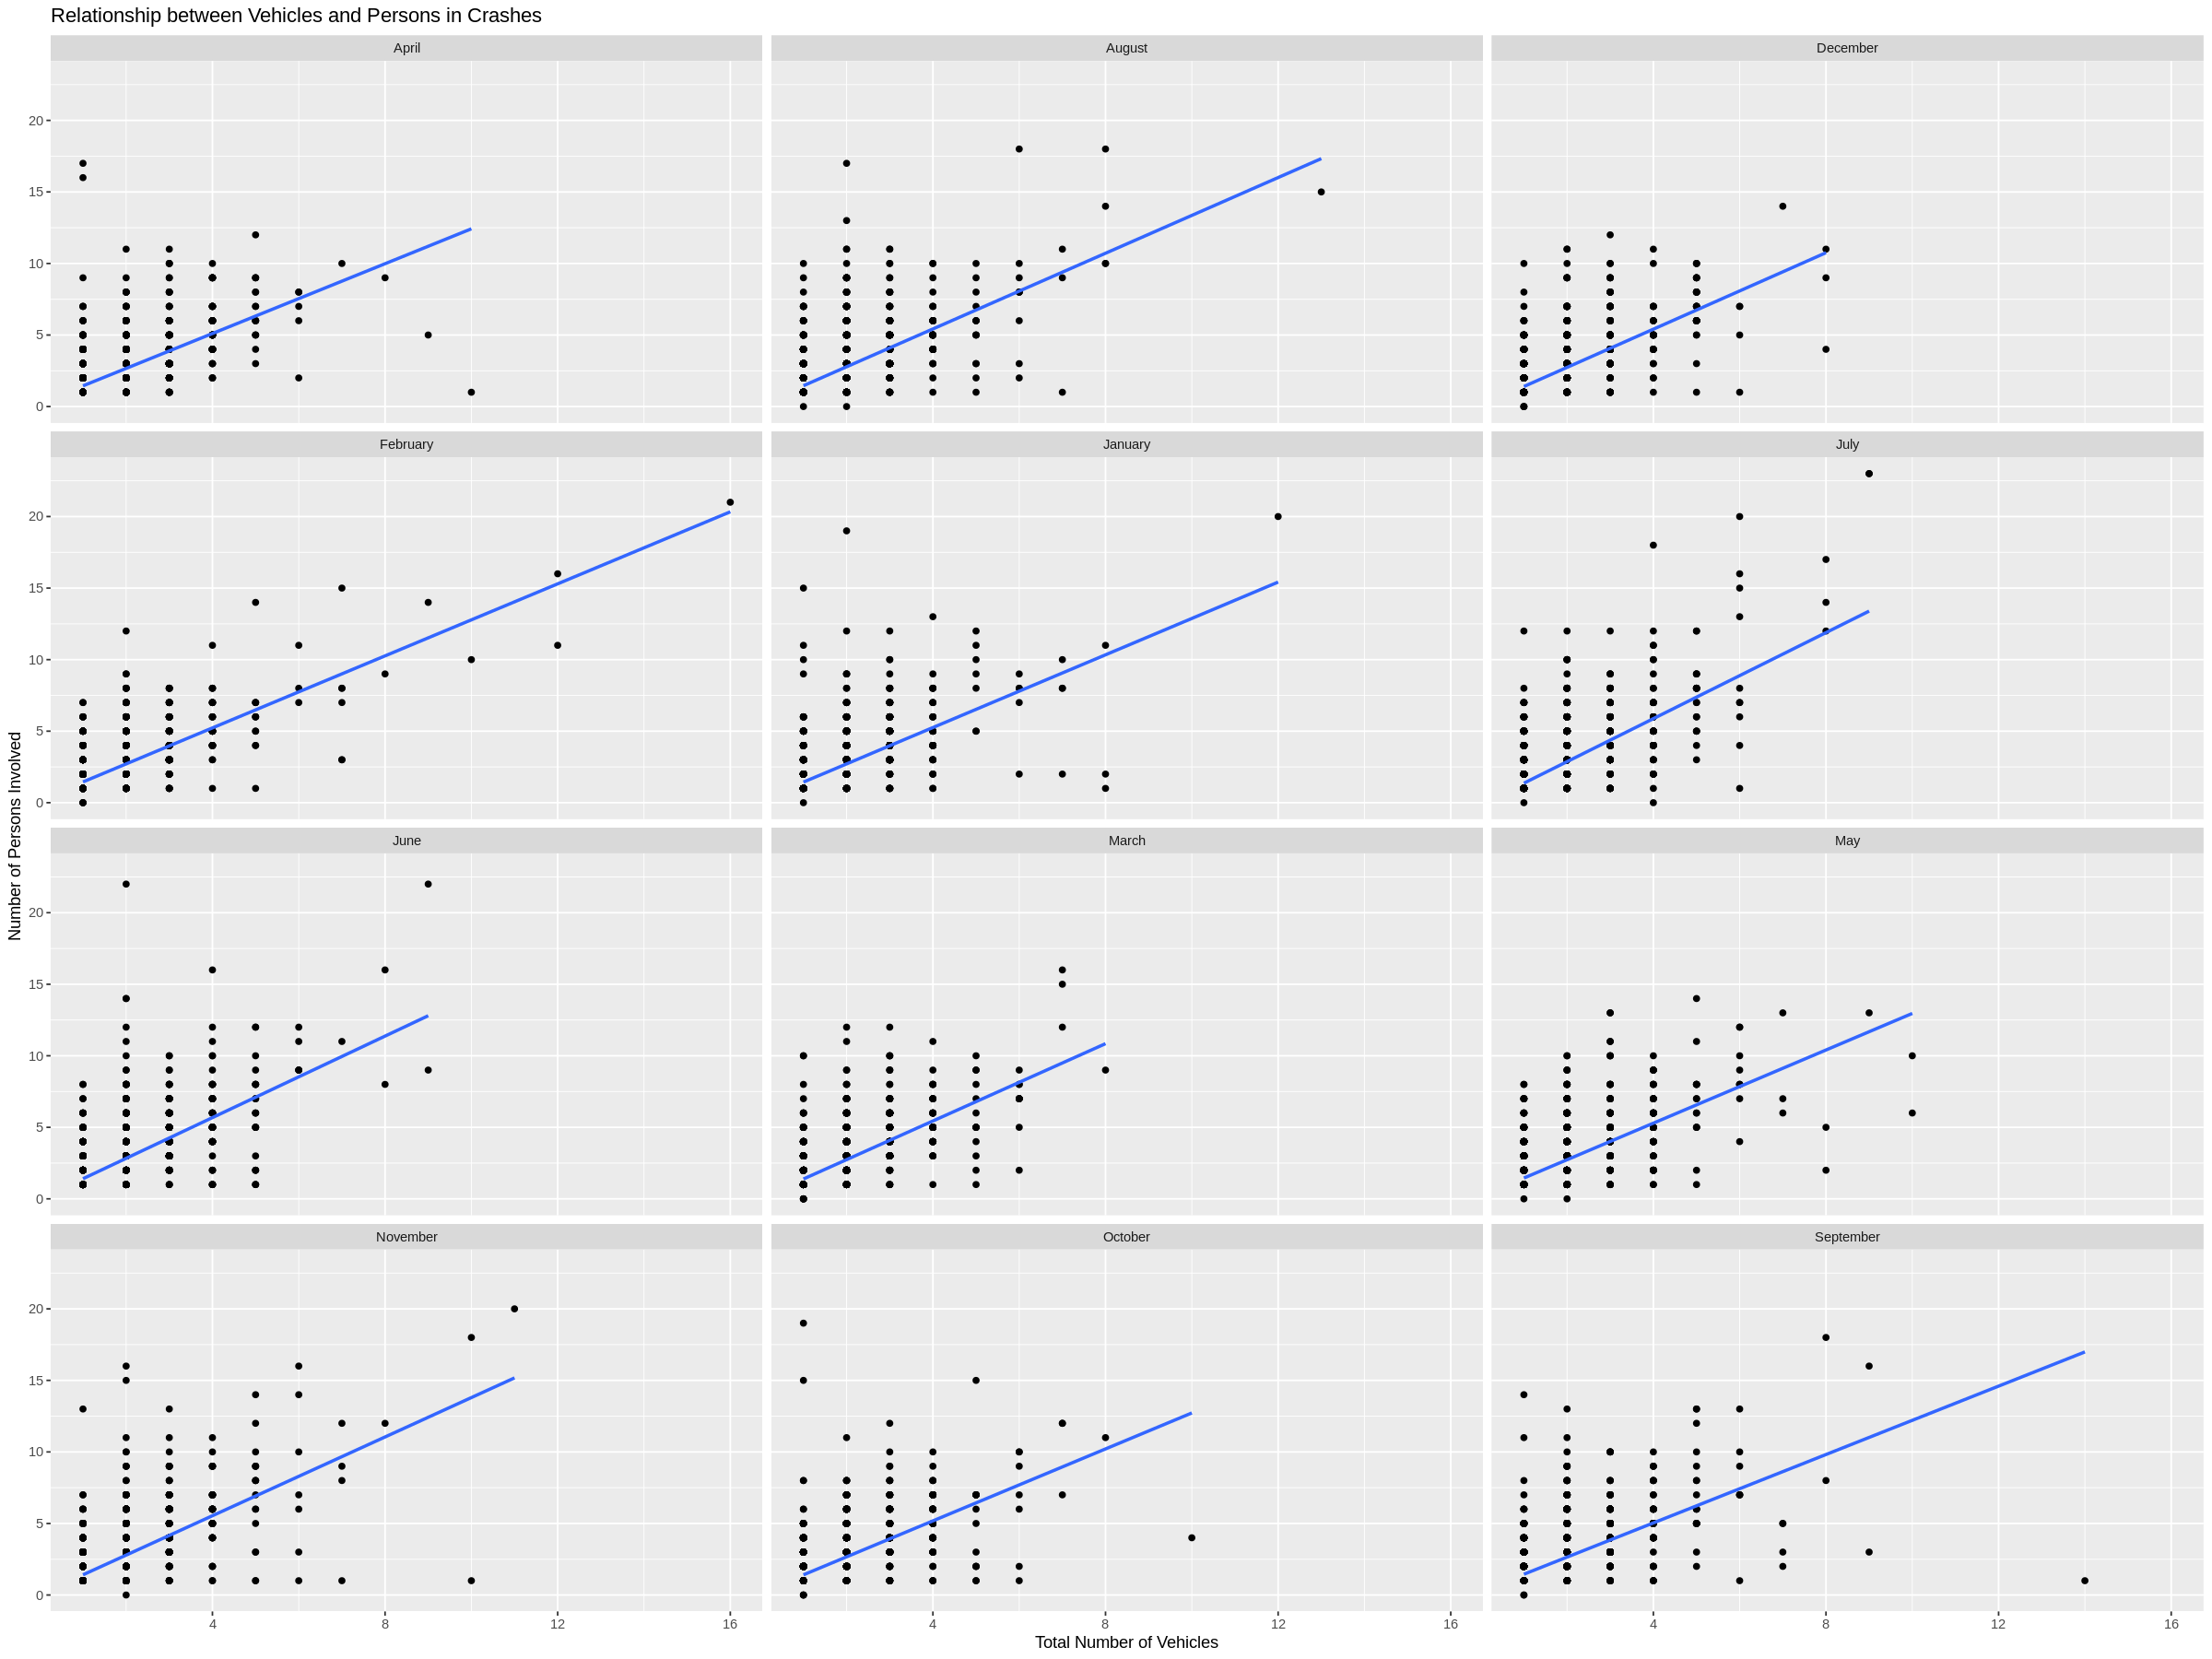

In [ ]:
# Filter the data
filtered_data <- accident_data[accident_data$VE_TOTAL <= 25 & accident_data$PERSONS <= 25, ]

# Load the ggplot2 package
library(ggplot2)

# Create a data frame with the variables
data <- data.frame(total_vehicles = filtered_data$VE_TOTAL, persons_involved = filtered_data$PERSONS, month = filtered_data$MONTHNAME)

# Create the scatter plot with subplots for each month
ggplot(data, aes(x = total_vehicles, y = persons_involved)) +
  geom_point() +
  xlab("Total Number of Vehicles") +
  ylab("Number of Persons Involved") +
  ggtitle("Relationship between Vehicles and Persons in Crashes") +
  geom_smooth(method = "lm", se = FALSE) + # This adds the regression line
  labs(linetype = "Regression line") +
  facet_wrap(~ month, ncol = 3) # Create subplots for each month


In [ ]:
filtered_data <- accident_data[accident_data$VE_TOTAL <= 25 & accident_data$PERSONS <= 25, ]

# Load the dplyr package
library(dplyr)

# Create a summary table
summary_table <- accident_data %>%
  group_by(MONTHNAME) %>%
  summarize(mean_persons = mean(PERSONS),
            mean_vehicles = mean(VE_TOTAL))

# Print the summary table
print(summary_table)

# A tibble: 12 × 3
   MONTHNAME mean_persons mean_vehicles
   <chr>            <dbl>         <dbl>
 1 April             2.18          1.60
 2 August            2.26          1.60
 3 December          2.17          1.58
 4 February          2.26          1.65
 5 January           2.17          1.56
 6 July              2.25          1.59
 7 June              2.29          1.61
 8 March             2.19          1.59
 9 May               2.26          1.62
10 November          2.28          1.61
11 October           2.11          1.56
12 September         2.18          1.60


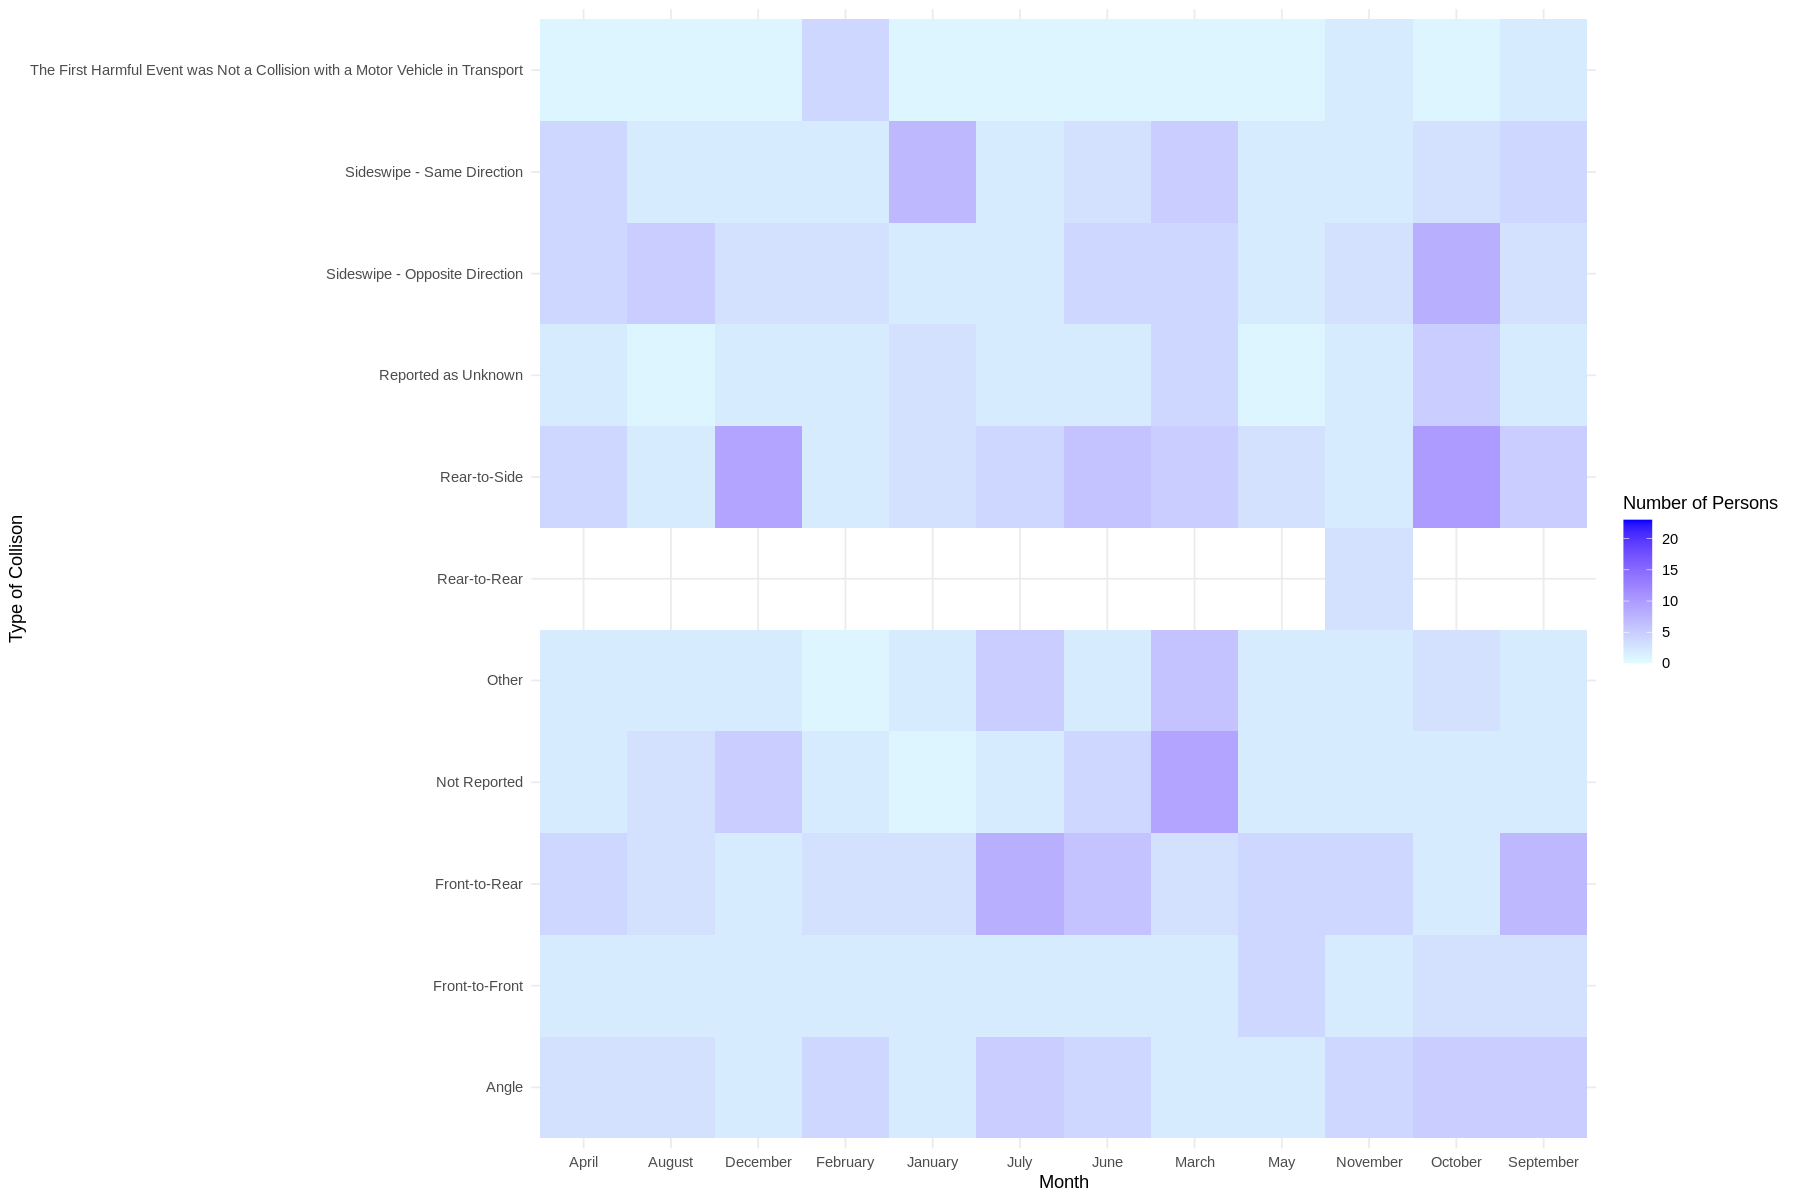

In [ ]:
options(repr.plot.width = 15, repr.plot.height=10)
heatmap_plot <- ggplot(filtered_data, aes(x = MONTHNAME, y = MAN_COLLNAME, fill = PERSONS)) +
  geom_tile() +
  scale_fill_gradient(low = "lightcyan1", high = "blue") +
  labs(x = "Month", y = "Type of Collison", fill = "Number of Persons") +
  theme_minimal()

# Display the plot
print(heatmap_plot)

In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



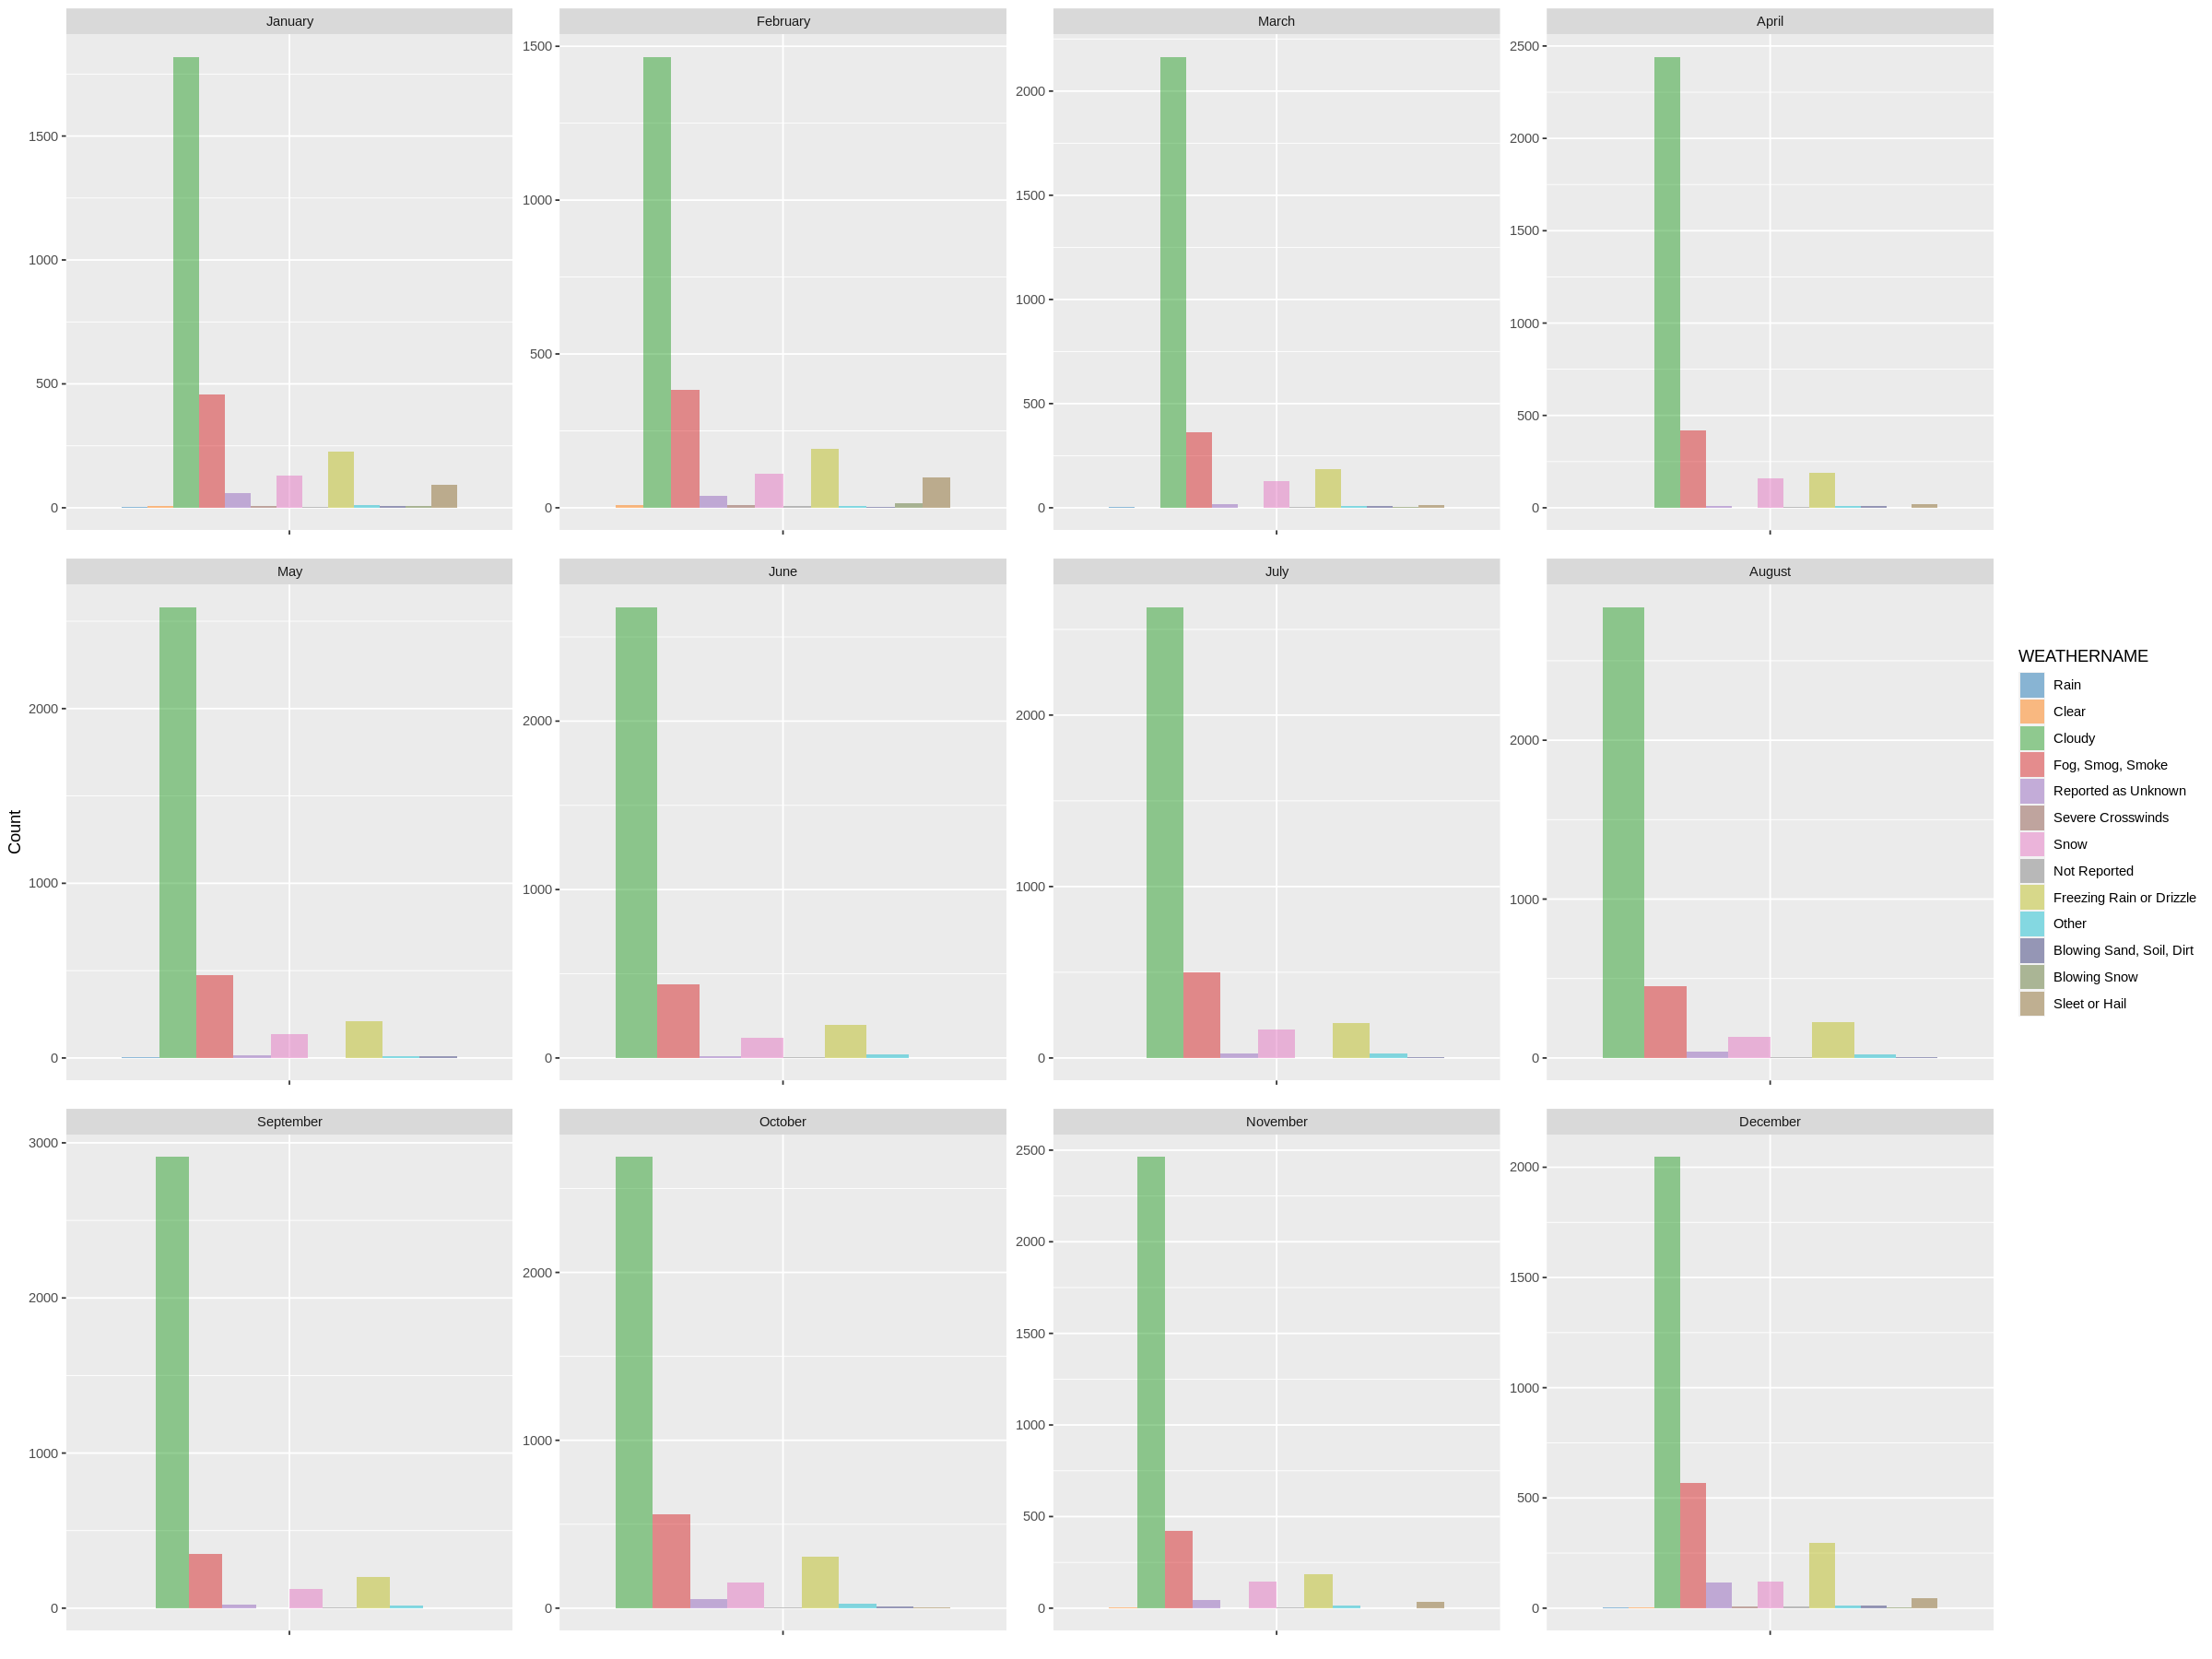

In [ ]:
unique_weather <- unique(accident_data$WEATHERNAME)
num_weather <- length(unique_weather)
color_palette <- c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#393b79", "#637939", "#8c6d31")
options(repr.plot.width = 20, repr.plot.height = 15)
# Convert MONTHNAME to a factor with custom levels in the desired order
accident_data$MONTHNAME <- factor(accident_data$MONTHNAME, levels = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

ggplot(data = accident_data, aes(x = "", fill = WEATHERNAME)) +
  geom_bar(alpha = 0.5, position = "dodge") +
  facet_wrap(~ MONTHNAME, scales = "free", drop = TRUE) +
  labs(x = NULL, y = "Count") +
  scale_fill_manual(values = color_palette, labels = unique_weather)

In [ ]:
# Create a table of counts for each weather condition based on each month
weather_counts <- table(accident_data$MONTHNAME, accident_data$WEATHERNAME)

# Print the table
print(weather_counts)


           
            Blowing Sand, Soil, Dirt Blowing Snow Clear Cloudy Fog, Smog, Smoke
  January                          2            8  1820    456               61
  February                         0           10  1466    382               40
  March                            4            1  2165    361               18
  April                            1            2  2442    421               11
  May                              3            0  2582    473               14
  June                             0            0  2678    438               13
  July                             1            0  2631    500               28
  August                           0            0  2839    452               42
  September                        2            0  2908    347               24
  October                          0            0  2687    558               54
  November                         0            2  2462    424               45
  December                  

In [ ]:
CarCrashes <- accident_data %>%
  group_by(HOUR) %>%
  summarize(n = n()) %>%
  arrange(desc(n))
CarCrashes <- CarCrashes[CarCrashes$HOUR <= 24, ]
CarCrashes <- CarCrashes %>%
  rename(Number_of_Crash = n)
# View the updated dataset
CarCrashes

HOUR,Number_of_Crash
<int>,<int>
18,2377
21,2359
20,2329
19,2280
17,2162
22,2061
15,1961
16,1893
23,1880


Hpothesis Test

Welch Two Sample test compares the mean of two months October and February to determine if there is evidence for significant difference between them. Here the t.statistic is 3.0125 with degree of freedom 2.2291 and p-value 0.08301.

$ H_0$: The no of total fatalities in summer months are greater than the no of total fatalities in winter months. <br>
$ H_1$: The no of total fatalities in summer months are less than the no of total fatalities in winter months. <br>

In [ ]:
# Filter the data for specific months
summer_data <- subset(deaths_by_month, MONTHNAME %in% c("June", "July", "August"))
winter_data <- subset(deaths_by_month, MONTHNAME %in% c("December", "January", "February"))

# Extracting the total number of vehicles in the crashes
summer_crashes <- summer_data$total_fatals
winter_crashes <- winter_data$total_fatals

t_test_result <- t.test(summer_crashes,winter_crashes, alternative = "two.sided")
t_test_result


	Welch Two Sample t-test

data:  summer_crashes and winter_crashes
t = 3.0125, df = 2.2291, p-value = 0.08301
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -249.2901 1931.2901
sample estimates:
mean of x mean of y 
 3893.667  3052.667 


Here the pvalue is 0.08301 hence there is a weak evidence against the null hypothesis. and we can say that the no of total fatalities in summer months are greater than the no of total fatalities in winter months.

In [ ]:
install.packages("BSDA")
library(BSDA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
hp2 <- accident_data %>%
  group_by(MONTHNAME) %>%
  summarize(total_persons = sum(PERSONS),
            total_vehicles = sum(VE_TOTAL))



In [ ]:
# Filter the data for specific months
spring_data <- subset(hp2, MONTHNAME %in% c("September", "October", "November"))
autumn_data <- subset(hp2, MONTHNAME %in% c("March", "April", "May"))

# Extracting the total number of vehicles in the crashes
spring_crashes <- summer_data$total_persons
autumn_crashes <- winter_data$total_persons

t_test_result <- t.test(summer_crashes,winter_crashes, alternative = "greater")
t_test_result


	Welch Two Sample t-test

data:  summer_crashes and winter_crashes
t = 1.7532, df = 2.4378, p-value = 0.09928
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -357.5433       Inf
sample estimates:
mean of x mean of y 
 7834.000  7086.667 


Null Hypothesis (H0): There is no difference in the proportions of severe crashes (defined as involving 2 or more people) between "Clear" and "Cloudy" weather conditions.

Alternative Hypothesis (H1): There is a significant difference in the proportions of severe crashes between "Clear" and "Cloudy" weather conditions.

In [ ]:
library(stats)

# Define threshold for crash severity (e.g., 6 or more people involved)
severity_threshold <- 6

# Filter data for crashes exceeding the threshold
severe_crashes <- subset(accident_data, PERSONS >= severity_threshold)

# Count crashes under each weather condition
success_clear <- sum(severe_crashes$WEATHERNAME == "Clear")
success_clear
success_cloudy <- sum(severe_crashes$WEATHERNAME == "Cloudy")
success_cloudy
# Calculate total crashes under each condition
total_clear <- sum(accident_data$WEATHERNAME == "Clear")
total_clear
total_cloudy <- sum(accident_data$WEATHERNAME == "Cloudy")
total_cloudy
prop.test(x = c(success_clear, success_cloudy),
          n = c(total_clear, total_cloudy))

[1] 1276

[1] 205

[1] 28726

[1] 5379


	2-sample test for equality of proportions with continuity correction

data:  c(success_clear, success_cloudy) out of c(total_clear, total_cloudy)
X-squared = 4.1901, df = 1, p-value = 0.04066
alternative hypothesis: two.sided
95 percent confidence interval:
 0.0005540081 0.0120630247
sample estimates:
    prop 1     prop 2 
0.04441969 0.03811117 


In [ ]:
# Define threshold for crash severity (e.g., 2 or more people involved)
severity_threshold <- 2

# Filter data for crashes exceeding the threshold
severe_crashes <- subset(accident_data, PERSONS >= severity_threshold)

# Extract the relevant variables
clear_data <- severe_crashes$WEATHERNAME == "Snow"
cloudy_data <- severe_crashes$WEATHERNAME == "Cloudy"

# Perform the two-sample Z-test for proportions
result <- prop.test(x = sum(clear_data), n = length(clear_data) + length(cloudy_data),
                    alternative = "less", p = sum(cloudy_data) / length(cloudy_data))

# Print the result
print(result)



	1-sample proportions test with continuity correction

data:  sum(clear_data) out of length(clear_data) + length(cloudy_data), null probability sum(cloudy_data)/length(cloudy_data)
X-squared = 11759, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is less than 0.1362071
95 percent confidence interval:
 0.000000000 0.004222895
sample estimates:
          p 
0.003836997 

